In [20]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Préparation des données

Nous importons les données json de la ligue et de la saison voulues, pour récupérer la liste des équipes, les résultats des matchs et les cotes associées des les bookmakers dans le but de créer un calendrier résumant cette saison.
Nous avons également chargé les données csv obtenues par l'approche fréquentiste.
On importe également les budgets de chaque équipe en début de saison. On a auparavent reporté ces budgets dans un fichier python en annexe, prenant le nom de Budgets.py. On a des dictionnaires associant les différentes équipes à leurs budgets respectifs.

In [21]:
from Budgets import *
pays = "France/"
saison = "1718"
budget = budgetFr1718
database = json.load(open(pays+'/'+saison+".json"))
dt = pd.read_json(pays+'/'+saison+'.json')
pourc = "25%"

Les données JSON sont parsées en une liste de dictionnaires.

On crée trois listes, team_names, journées et id_match. On parcours la base de données JSON ('database') et à chaque boucle on ajoute le nom de l'équipe qui joue à domicile dans la liste team_names, la date de la journée dans la liste journées et la valeur de p, qu'on incrémente d'un à chaque tour, et qui représente donc le numéro du match. 
----> team_names, journées, id_match

In [22]:
team_names = []
journees = []
id_match = []
p=1
for ele in database:
    team_names.append(ele["HomeTeam"])
    journees.append(ele["Date"])
    id_match.append(p)
    p+=1
team_names

['Monaco',
 'Lyon',
 'Metz',
 'Montpellier',
 'Paris SG',
 'St Etienne',
 'Troyes',
 'Angers',
 'Lille',
 'Marseille',
 'Nice',
 'Rennes',
 'Amiens',
 'Bordeaux',
 'Caen',
 'Nantes',
 'Toulouse',
 'Dijon',
 'Guingamp',
 'Strasbourg',
 'Metz',
 'Lyon',
 'Montpellier',
 'Nice',
 'Rennes',
 'St Etienne',
 'Troyes',
 'Lille',
 'Marseille',
 'Paris SG',
 'Paris SG',
 'Amiens',
 'Bordeaux',
 'Caen',
 'Dijon',
 'Nantes',
 'Toulouse',
 'Angers',
 'Guingamp',
 'Monaco',
 'Lille',
 'Metz',
 'Caen',
 'Montpellier',
 'Nice',
 'Strasbourg',
 'Troyes',
 'Lyon',
 'Marseille',
 'St Etienne',
 'Toulouse',
 'Dijon',
 'Guingamp',
 'Monaco',
 'Nantes',
 'Troyes',
 'Amiens',
 'Angers',
 'Paris SG',
 'Rennes',
 'Lille',
 'Nice',
 'Bordeaux',
 'Caen',
 'Lyon',
 'Metz',
 'Montpellier',
 'Marseille',
 'St Etienne',
 'Strasbourg',
 'Monaco',
 'Dijon',
 'Guingamp',
 'Nantes',
 'Paris SG',
 'Rennes',
 'Angers',
 'Nice',
 'Troyes',
 'Lyon',
 'Caen',
 'Dijon',
 'Guingamp',
 'Lille',
 'St Etienne',
 'Toulouse',
 'Bo

Pour faciliter le traitement des données, on ordonne nos listes team_names et journees.
Pour team_names, on veut les 20 équipes, donc on demande à numpy de nous sortir une fois chaque nom d'équipe. 
Pour journees, on veut l'ordre croissant des dates.
----> team_names, journees

In [23]:
team_names = list(np.unique(np.array(sorted(team_names))))
journees = list(np.unique(np.array(sorted(journees))))

On crée un dictionnaire qui prend comme clés le nom des différentes équipes et comme valeur un entier associé, cela facilitera l'association avec les différents matchs présents dans notre base de données.
----> team_names_dict

In [24]:
team_names_dict = dict()
i = 0
for team_name in team_names:
    team_names_dict[team_name] = i
    i += 1
team_names_dict

{'Amiens': 0,
 'Angers': 1,
 'Bordeaux': 2,
 'Caen': 3,
 'Dijon': 4,
 'Guingamp': 5,
 'Lille': 6,
 'Lyon': 7,
 'Marseille': 8,
 'Metz': 9,
 'Monaco': 10,
 'Montpellier': 11,
 'Nantes': 12,
 'Nice': 13,
 'Paris SG': 14,
 'Rennes': 15,
 'St Etienne': 16,
 'Strasbourg': 17,
 'Toulouse': 18,
 'Troyes': 19}

In [25]:
team_names_dict

{'Amiens': 0,
 'Angers': 1,
 'Bordeaux': 2,
 'Caen': 3,
 'Dijon': 4,
 'Guingamp': 5,
 'Lille': 6,
 'Lyon': 7,
 'Marseille': 8,
 'Metz': 9,
 'Monaco': 10,
 'Montpellier': 11,
 'Nantes': 12,
 'Nice': 13,
 'Paris SG': 14,
 'Rennes': 15,
 'St Etienne': 16,
 'Strasbourg': 17,
 'Toulouse': 18,
 'Troyes': 19}

On fait la même chose pour les différentes journées avec les dates

In [26]:
journees_dict = dict()
i = 0
for journee in journees:
    journees_dict[journee] = i
    i += 1
journees_dict

{'01/04/18': 0,
 '01/10/17': 1,
 '01/12/17': 2,
 '02/02/18': 3,
 '02/03/18': 4,
 '02/12/17': 5,
 '03/02/18': 6,
 '03/03/18': 7,
 '03/11/17': 8,
 '03/12/17': 9,
 '04/02/18': 10,
 '04/03/18': 11,
 '04/04/18': 12,
 '04/05/18': 13,
 '04/08/17': 14,
 '04/11/17': 15,
 '05/08/17': 16,
 '05/11/17': 17,
 '06/04/18': 18,
 '06/05/18': 19,
 '06/08/17': 20,
 '07/04/18': 21,
 '08/04/18': 22,
 '08/09/17': 23,
 '08/12/17': 24,
 '09/02/18': 25,
 '09/03/18': 26,
 '09/09/17': 27,
 '09/12/17': 28,
 '10/02/18': 29,
 '10/03/18': 30,
 '10/09/17': 31,
 '10/12/17': 32,
 '11/02/18': 33,
 '11/03/18': 34,
 '11/05/18': 35,
 '11/08/17': 36,
 '12/01/18': 37,
 '12/05/18': 38,
 '12/08/17': 39,
 '13/01/18': 40,
 '13/04/18': 41,
 '13/08/17': 42,
 '13/10/17': 43,
 '14/01/18': 44,
 '14/03/18': 45,
 '14/04/18': 46,
 '14/10/17': 47,
 '15/04/18': 48,
 '15/09/17': 49,
 '15/10/17': 50,
 '15/12/17': 51,
 '16/01/18': 52,
 '16/02/18': 53,
 '16/03/18': 54,
 '16/09/17': 55,
 '16/12/17': 56,
 '17/01/18': 57,
 '17/02/18': 58,
 '17/03

In [27]:
journees_dict

{'01/04/18': 0,
 '01/10/17': 1,
 '01/12/17': 2,
 '02/02/18': 3,
 '02/03/18': 4,
 '02/12/17': 5,
 '03/02/18': 6,
 '03/03/18': 7,
 '03/11/17': 8,
 '03/12/17': 9,
 '04/02/18': 10,
 '04/03/18': 11,
 '04/04/18': 12,
 '04/05/18': 13,
 '04/08/17': 14,
 '04/11/17': 15,
 '05/08/17': 16,
 '05/11/17': 17,
 '06/04/18': 18,
 '06/05/18': 19,
 '06/08/17': 20,
 '07/04/18': 21,
 '08/04/18': 22,
 '08/09/17': 23,
 '08/12/17': 24,
 '09/02/18': 25,
 '09/03/18': 26,
 '09/09/17': 27,
 '09/12/17': 28,
 '10/02/18': 29,
 '10/03/18': 30,
 '10/09/17': 31,
 '10/12/17': 32,
 '11/02/18': 33,
 '11/03/18': 34,
 '11/05/18': 35,
 '11/08/17': 36,
 '12/01/18': 37,
 '12/05/18': 38,
 '12/08/17': 39,
 '13/01/18': 40,
 '13/04/18': 41,
 '13/08/17': 42,
 '13/10/17': 43,
 '14/01/18': 44,
 '14/03/18': 45,
 '14/04/18': 46,
 '14/10/17': 47,
 '15/04/18': 48,
 '15/09/17': 49,
 '15/10/17': 50,
 '15/12/17': 51,
 '16/01/18': 52,
 '16/02/18': 53,
 '16/03/18': 54,
 '16/09/17': 55,
 '16/12/17': 56,
 '17/01/18': 57,
 '17/02/18': 58,
 '17/03

In [28]:
cote_nul=[]
cols = dt.columns.tolist()
for i in cols:
    if i[-1]=='D':
        cote_nul.append(i)
    else :
        pass

# Création du calendrier

Enfin on peut créer le calendrier de la saison 2017-2018. Le calendrier comporte les résultats du nombre d'équipes dans team_names pour le nombre de journées dans journees.
Nous avons besoin du numéro du match, du numéro de l'équipe à domicile, celui de l'équipe à l'extérieur et de la côte la plus élevée du match nul. 
Ce calendrier devrait être une matrice len(team_names)$*$len(journees)$*$4.
On crée cette matrice qui s'appelle calendrier.

Mais nous ne voulons que les matchs dont le résultat a été nul, les autres ne nous sont pas utiles ici. 
Nous créons la liste calendrier_nul, dans laquelle nous ajouterons chaque ligne de la matrice calendrier dont le match a bien été nul.

----> calendrier est une matrice de format len(team_names)$*$len(journees)$*$4, dans laquelle, tout les matchs du championnat sont inclus. 
----> calendrier_nul est une liste dans laquelle chaque donnée est une ligne de la matrice calendrier, dont le match a été nul.

In [29]:
nb_teams = len(team_names)
nb_journees = len(journees)
calendrier = np.zeros((nb_journees, nb_teams, 4))
calendrier_nul = []
numero=1
i=0
for ele in database :
    cotesup=0
    coteval=[]
    home_team = ele["HomeTeam"]
    away_team = ele["AwayTeam"]
    home_goal = ele["FTHG"]
    away_goal = ele["FTAG"]
    journee = ele["Date"]
    for y in cote_nul:
        if ele[y]!='':
            cote =ele[y]
            cote_nom=y
            if cote > cotesup :
                cotesup=cote
                cote_nom2=cote_nom
        else:
            pass
    if home_goal == away_goal :
        calendrier[journees_dict[journee]][team_names_dict[home_team]] = [numero, team_names_dict[home_team], team_names_dict[away_team], cotesup]
        a=calendrier[journees_dict[journee]][team_names_dict[home_team]]
        calendrier_nul.append(a)
    else :
        pass
    numero+=1
    i+=1
calendrier_nul = np.asarray(calendrier_nul)
calendrier_nul

array([[  7.  ,  19.  ,  15.  ,   3.2 ],
       [  8.  ,   1.  ,   2.  ,   3.14],
       [ 22.  ,   7.  ,   2.  ,   4.33],
       [ 23.  ,  11.  ,  17.  ,   3.75],
       [ 25.  ,  15.  ,   4.  ,   4.15],
       [ 29.  ,   8.  ,   1.  ,   4.07],
       [ 36.  ,  12.  ,   7.  ,   3.66],
       [ 38.  ,   1.  ,   6.  ,   3.3 ],
       [ 41.  ,   6.  ,   2.  ,   3.37],
       [ 47.  ,  19.  ,  18.  ,   3.31],
       [ 50.  ,  16.  ,   1.  ,   3.21],
       [ 62.  ,  13.  ,   1.  ,   3.65],
       [ 65.  ,   7.  ,   4.  ,   6.5 ],
       [ 67.  ,  11.  ,  14.  ,   7.75],
       [ 69.  ,  16.  ,  15.  ,   3.36],
       [ 71.  ,  10.  ,  11.  ,   5.75],
       [ 72.  ,   4.  ,  17.  ,   3.54],
       [ 73.  ,   5.  ,  18.  ,   3.57],
       [ 77.  ,   1.  ,   7.  ,   3.65],
       [ 84.  ,   6.  ,  19.  ,   4.02],
       [ 87.  ,   2.  ,  12.  ,   3.79],
       [ 89.  ,  17.  ,   8.  ,   3.65],
       [ 97.  ,   8.  ,  14.  ,   5.8 ],
       [104.  ,   5.  ,   0.  ,   3.78],
       [106.  , 

In [30]:
calendrier_nul

array([[  7.  ,  19.  ,  15.  ,   3.2 ],
       [  8.  ,   1.  ,   2.  ,   3.14],
       [ 22.  ,   7.  ,   2.  ,   4.33],
       [ 23.  ,  11.  ,  17.  ,   3.75],
       [ 25.  ,  15.  ,   4.  ,   4.15],
       [ 29.  ,   8.  ,   1.  ,   4.07],
       [ 36.  ,  12.  ,   7.  ,   3.66],
       [ 38.  ,   1.  ,   6.  ,   3.3 ],
       [ 41.  ,   6.  ,   2.  ,   3.37],
       [ 47.  ,  19.  ,  18.  ,   3.31],
       [ 50.  ,  16.  ,   1.  ,   3.21],
       [ 62.  ,  13.  ,   1.  ,   3.65],
       [ 65.  ,   7.  ,   4.  ,   6.5 ],
       [ 67.  ,  11.  ,  14.  ,   7.75],
       [ 69.  ,  16.  ,  15.  ,   3.36],
       [ 71.  ,  10.  ,  11.  ,   5.75],
       [ 72.  ,   4.  ,  17.  ,   3.54],
       [ 73.  ,   5.  ,  18.  ,   3.57],
       [ 77.  ,   1.  ,   7.  ,   3.65],
       [ 84.  ,   6.  ,  19.  ,   4.02],
       [ 87.  ,   2.  ,  12.  ,   3.79],
       [ 89.  ,  17.  ,   8.  ,   3.65],
       [ 97.  ,   8.  ,  14.  ,   5.8 ],
       [104.  ,   5.  ,   0.  ,   3.78],
       [106.  , 

# Prédiction des résultats en championnat par un modèle de Poisson

## Version 1 : Tirage unique

Pour la version 1 de notre modélisation, nous allons définir deux paramètres. Le score offensif et le score défensif d'une équipe. Ces deux paramètres sont basés sur le budget de chaque équipe pour la saison. Enfin, le paramètre de Poisson pour l'équipe i est représenté par le produit du score offensif de l'équipe i par le score défensif de l'équipe j. Le nombre de buts marqués par chaque équipe est considéré comme la variable de Poisson. On sait d'avance que cette méthode ne sera pas fiable. 

## Score offensif et défensif

On fait deux matrices score_attaque et score_défense, qui prennent la dimension du nombre d'équipes.
On détermine ensuite, comme décrit précédemment le score_attaque et le score défense de chaque équipe dans les matrices respectives.

In [31]:
score_attaque = np.zeros(nb_teams)
score_defense = np.zeros(nb_teams)


mean_budget = 0
for elem in budget.values():
    mean_budget += elem
mean_budget /= nb_teams


for key,elem in budget.items():
    score_attaque[team_names_dict[key]] = elem/mean_budget
    score_defense[team_names_dict[key]] = mean_budget/elem

In [32]:
print("Score attaque: {}".format(score_attaque))
print("Score defense: {}".format(score_defense))

Score attaque: [0.28694405 0.32137733 0.74605452 0.36728838 0.36728838 0.29842181
 1.03299857 2.75466284 1.37733142 0.37876614 1.95121951 0.49928264
 0.51649928 0.51649928 6.19799139 0.57388809 0.7804878  0.34433286
 0.3902439  0.29842181]
Score defense: [3.485      3.11160714 1.34038462 2.72265625 2.72265625 3.35096154
 0.96805556 0.36302083 0.72604167 2.64015152 0.5125     2.00287356
 1.93611111 1.93611111 0.16134259 1.7425     1.28125    2.90416667
 2.5625     3.35096154]


On a besoin de trois information dans cette prédiction. Le numéro du match et les numéros des deux équipes.
Création d'une matrice de la dimension nombre_de_journées * nombre_d'équipe * 3.
Prédit chaque match une fois en l'incluant dans cette matrice, et s'il est prédit comme étant nul, alors on l'ajoute à la liste predicted_calendrier_nul.

In [33]:
predicted_calendrier = np.zeros((nb_journees, nb_teams, 3))
predicted_calendrier_nul = []
numero=1
for ele in database:
    home_team = ele["HomeTeam"]
    away_team = ele["AwayTeam"]
    home_goal = np.random.poisson(score_attaque[team_names_dict[home_team]]*score_defense[team_names_dict[away_team]],1)
    away_goal = np.random.poisson(score_attaque[team_names_dict[away_team]]*score_defense[team_names_dict[home_team]],1)
    journee = ele["Date"]
    if home_goal == away_goal :
        predicted_calendrier[journees_dict[journee]][team_names_dict[home_team]] = [numero, team_names_dict[home_team], team_names_dict[away_team]]
        a=predicted_calendrier[journees_dict[journee]][team_names_dict[home_team]]
        predicted_calendrier_nul.append(a)
    else :
        pass
    numero+=1
predicted_calendrier_nul = np.asarray(predicted_calendrier_nul)

In [34]:
print(predicted_calendrier_nul)

[[ 17.  18.  11.]
 [ 23.  11.  17.]
 [ 34.   3.   9.]
 [ 37.  18.  15.]
 [ 46.  17.   0.]
 [ 47.  19.  18.]
 [ 55.  12.   3.]
 [ 56.  19.  11.]
 [ 66.   9.  19.]
 [ 72.   4.  17.]
 [ 81.   3.   1.]
 [ 86.  18.   0.]
 [ 88.  11.  13.]
 [ 89.  17.   8.]
 [101.   2.  10.]
 [104.   5.   0.]
 [107.   6.   8.]
 [115.  19.  17.]
 [128.   3.  13.]
 [131.  16.  17.]
 [134.   9.   0.]
 [135.  11.   6.]
 [137.  19.   1.]
 [144.   1.  15.]
 [151.   4.   2.]
 [161.   2.  17.]
 [166.  14.   6.]
 [167.  18.   3.]
 [178.   7.   8.]
 [183.   2.  11.]
 [193.   4.   9.]
 [210.  18.  12.]
 [212.   0.   5.]
 [214.  12.   2.]
 [215.  15.   1.]
 [217.  19.   6.]
 [218.   7.  14.]
 [221.   4.  15.]
 [223.   5.  12.]
 [226.  16.   3.]
 [230.   8.  10.]
 [232.   0.  16.]
 [235.  13.  18.]
 [238.  10.   7.]
 [243.   4.  13.]
 [244.   5.   3.]
 [245.   9.  11.]
 [248.  12.   6.]
 [259.  13.  12.]
 [266.  15.  19.]
 [271.  10.   2.]
 [274.   1.   5.]
 [284.   6.  11.]
 [295.   2.  15.]
 [296.  11.   4.]
 [308.  17

Avec cette version, on obtient des résultats différents à chaque tirage. On ne peut pas en déduire en prédiction.

## Version 2 : 1000 tirages

Dans cette version, nous allons répondre à la problématique de la version antérieure. En effet, nous allons simuler 1000 fois la saison pour en dégager une moyenne de match nul prédits.

Nous voulons ici plus d'information que dans la version précédente : le numéro du match, le nombre de match nul qui ont été prédit dans les 1000 tirages, la cote la plus élevée du match nul ainsi que la cote respective de la victoire et de la défaite.
Avant tout, on crée une liste ('grandeliste'), ainsi qu'une deuxième ('num') qui prend d'office le format [id_match,0,0,0,0].
Ensuite, on ajoute autant de fois la liste num qu'il y a de journées, en remplacant à chaque fois, id_match dans num. 
On se retrouve alors avec grandeliste qui comporte len(id_match) fois la liste num. Pour le cas de la ligue 1, on a 380 fois num dans grandeliste. 

In [35]:
grandeliste=[]
id_mat=1
while id_mat <= len(id_match) :
    num=[id_mat,0,0,0,0]
    grandeliste.append(num)
    id_mat+=1
grandeliste

[[1, 0, 0, 0, 0],
 [2, 0, 0, 0, 0],
 [3, 0, 0, 0, 0],
 [4, 0, 0, 0, 0],
 [5, 0, 0, 0, 0],
 [6, 0, 0, 0, 0],
 [7, 0, 0, 0, 0],
 [8, 0, 0, 0, 0],
 [9, 0, 0, 0, 0],
 [10, 0, 0, 0, 0],
 [11, 0, 0, 0, 0],
 [12, 0, 0, 0, 0],
 [13, 0, 0, 0, 0],
 [14, 0, 0, 0, 0],
 [15, 0, 0, 0, 0],
 [16, 0, 0, 0, 0],
 [17, 0, 0, 0, 0],
 [18, 0, 0, 0, 0],
 [19, 0, 0, 0, 0],
 [20, 0, 0, 0, 0],
 [21, 0, 0, 0, 0],
 [22, 0, 0, 0, 0],
 [23, 0, 0, 0, 0],
 [24, 0, 0, 0, 0],
 [25, 0, 0, 0, 0],
 [26, 0, 0, 0, 0],
 [27, 0, 0, 0, 0],
 [28, 0, 0, 0, 0],
 [29, 0, 0, 0, 0],
 [30, 0, 0, 0, 0],
 [31, 0, 0, 0, 0],
 [32, 0, 0, 0, 0],
 [33, 0, 0, 0, 0],
 [34, 0, 0, 0, 0],
 [35, 0, 0, 0, 0],
 [36, 0, 0, 0, 0],
 [37, 0, 0, 0, 0],
 [38, 0, 0, 0, 0],
 [39, 0, 0, 0, 0],
 [40, 0, 0, 0, 0],
 [41, 0, 0, 0, 0],
 [42, 0, 0, 0, 0],
 [43, 0, 0, 0, 0],
 [44, 0, 0, 0, 0],
 [45, 0, 0, 0, 0],
 [46, 0, 0, 0, 0],
 [47, 0, 0, 0, 0],
 [48, 0, 0, 0, 0],
 [49, 0, 0, 0, 0],
 [50, 0, 0, 0, 0],
 [51, 0, 0, 0, 0],
 [52, 0, 0, 0, 0],
 [53, 0, 0, 0, 0],
 [

Le but de ces listes dans une grande liste, est qu'on attribue des lignes à grandeliste dont chacune représente un match. Lors des 1000 tirages, on va pour chaque ligne incrémenter le nombre de nuls prédits. A la fin, on se retrouve alors avec pour chaque ligne, le numéro du match, le nombre de matchs nuls qui ont été prédit dans les 1000 tirages, la cote la plus élevée du match nul ainsi que la cote respective de la victoire et de la défaite. 

In [36]:
for x in range(1000):
    p=0
    for ele in database:
        cotesup=0
        coteval=[]
        home_team = ele["HomeTeam"]
        away_team = ele["AwayTeam"]
        for y in cote_nul:
            if ele[y]!='':
                cote =ele[y]
                cote_nom=y
                if cote > cotesup :
                    cotesup=cote
                    cote_nom2=cote_nom
            else:
                pass
        cote_nom_away=cote_nom2[:-1]+'A'
        cote_nom_home=cote_nom2[:-1]+'H'
        cote_nom_A=ele[cote_nom_away]
        cote_nom_H=ele[cote_nom_home]
        home_goal = np.random.poisson(score_attaque[team_names_dict[home_team]]*score_defense[team_names_dict[away_team]],1)
        away_goal = np.random.poisson(score_attaque[team_names_dict[away_team]]*score_defense[team_names_dict[home_team]],1)
        
        
        if(home_goal == away_goal):
            grandeliste[p][1]=grandeliste[p][1]+1
            grandeliste[p][2]=cotesup
            grandeliste[p][3]=cote_nom_A
            grandeliste[p][4]=cote_nom_H
        else :
            pass
        p+=1
grandeliste

[[1, 12, 6, 11.2, 1.35],
 [2, 0, 0, 0, 0],
 [3, 285, 3.35, 2.54, 3.01],
 [4, 290, 3.69, 4.92, 1.83],
 [5, 0, 0, 0, 0],
 [6, 268, 3.25, 3.75, 2.33],
 [7, 196, 3.2, 2.75, 2.7],
 [8, 117, 3.14, 3.31, 2.5],
 [9, 198, 3.3, 4.2, 2.3],
 [10, 49, 5.8, 11.5, 1.31],
 [11, 236, 4.51, 7.06, 1.52],
 [12, 18, 3.68, 2.09, 3.69],
 [13, 298, 3.14, 2.75, 3.04],
 [14, 194, 5.05, 7.76, 1.44],
 [15, 195, 3.24, 2.64, 3.01],
 [16, 120, 3.44, 2.25, 3.7],
 [17, 319, 3.25, 3.5, 2.2],
 [18, 5, 4.67, 1.51, 7.05],
 [19, 0, 0, 0, 0],
 [20, 79, 3.59, 2.12, 3.7],
 [21, 7, 5.93, 1.33, 10.3],
 [22, 42, 4.33, 5.5, 1.57],
 [23, 254, 3.75, 4.85, 1.88],
 [24, 235, 3.64, 4.82, 1.86],
 [25, 245, 4.15, 6.41, 1.65],
 [26, 100, 4.1, 7.75, 1.57],
 [27, 241, 3.25, 3.04, 2.61],
 [28, 114, 4, 5.5, 1.62],
 [29, 24, 4.07, 6.21, 1.62],
 [30, 0, 0, 0, 0],
 [31, 0, 0, 0, 0],
 [32, 226, 3.33, 2.42, 3.25],
 [33, 128, 4.92, 8.94, 1.42],
 [34, 274, 3.7, 5.07, 1.81],
 [35, 279, 3.32, 2.95, 2.65],
 [36, 10, 3.66, 2.16, 3.47],
 [37, 262, 3.31,

Une fois la prédiction effectuée, on veut savoir si l'on aurait gagné de l'argent en suivant ces prédictions. 
Pour cela, on va calculer notre solde durant la saison en simulant des paris. Mais avant tout, on veut vérifier à vue d'oeil la répartition de nos matchs nuls prédits. On a alors besoin de séparer de la grande liste, la colonne du nombre de matchs prédits, et le numéro des matchs. On en profite pour diviser par 1000 le nombre de matchs prédits, afin d'obtenir nos probabilités estimées. 
----> matchs, results

In [37]:
matchs=[]
results=[]

i=0
while i < len(grandeliste):
    matchs.append(grandeliste[i][0])
    results.append(grandeliste[i][1]/1000)
    i+=1

In [38]:
results

[0.012,
 0.0,
 0.285,
 0.29,
 0.0,
 0.268,
 0.196,
 0.117,
 0.198,
 0.049,
 0.236,
 0.018,
 0.298,
 0.194,
 0.195,
 0.12,
 0.319,
 0.005,
 0.0,
 0.079,
 0.007,
 0.042,
 0.254,
 0.235,
 0.245,
 0.1,
 0.241,
 0.114,
 0.024,
 0.0,
 0.0,
 0.226,
 0.128,
 0.274,
 0.279,
 0.01,
 0.262,
 0.077,
 0.323,
 0.26,
 0.274,
 0.0,
 0.293,
 0.299,
 0.026,
 0.339,
 0.291,
 0.0,
 0.136,
 0.147,
 0.202,
 0.171,
 0.044,
 0.015,
 0.276,
 0.218,
 0.01,
 0.306,
 0.164,
 0.299,
 0.189,
 0.247,
 0.136,
 0.279,
 0.001,
 0.28,
 0.0,
 0.049,
 0.28,
 0.242,
 0.036,
 0.302,
 0.281,
 0.275,
 0.003,
 0.236,
 0.0,
 0.111,
 0.114,
 0.281,
 0.307,
 0.0,
 0.193,
 0.045,
 0.201,
 0.277,
 0.268,
 0.298,
 0.033,
 0.256,
 0.121,
 0.298,
 0.292,
 0.009,
 0.237,
 0.239,
 0.025,
 0.252,
 0.0,
 0.0,
 0.111,
 0.3,
 0.285,
 0.287,
 0.323,
 0.314,
 0.265,
 0.002,
 0.193,
 0.302,
 0.0,
 0.0,
 0.21,
 0.284,
 0.321,
 0.056,
 0.096,
 0.271,
 0.053,
 0.002,
 0.278,
 0.281,
 0.329,
 0.0,
 0.242,
 0.317,
 0.208,
 0.262,
 0.011,
 0.039,
 0

In [39]:
def nuagedepoint(x,y, xlimitea, xlimiteb, ylimitea, ylimiteb):
    axes = plt.gca()
    plt.scatter(x,y)
    plt.xlabel('match',)
    plt.ylabel('fréquence nuls')
    axes.set_xlim(xlimitea, xlimiteb)
    axes.set_ylim(ylimitea, ylimiteb)
    plt.show()

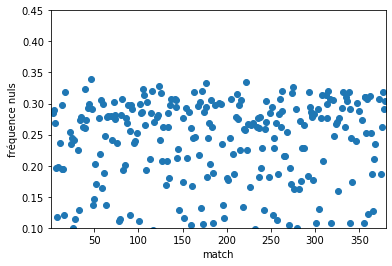

In [40]:
nuagedepoint(matchs, results, 1,len(matchs),0.1,0.45)

#### Sélection des nuls en fonction de la fréquence

Désormais, on va sélectionner dans ces matchs prédits ceux qui ont une fréquence assez élevée. On détermine la fréquence minimale de manière arbitraire au début. 
Le grapiqueB est une fonction qui génère un graphique en courbe des données x et y.
On va intégrer ce graphique à la fin de la fonction graph1, dans laquelle on va préparer les données x et y. 
'x' est simplement le nombre de match sur lesquels on va parier, 'y' est notre solde, évoluant à chaque match parié donc. 

Pour obtenir ces deux listes : on va parcourir grandeliste et ajouter la ligne du match à une liste nommée 'nul' lorsqu'il répondra au critère de sélection demandé en appelant la fonction.
Une fois qu'on a cette liste, on parcours 'calendrier_nul', et lorsque le match dans nul est présent dans calendrier nul, alors on gagne la mise * la cote - la mise. S'il n'est pas présent, on perd la mise. Ce petit calcul est fait dans la variable 'solded', que l'on ajoute (on enregistre donc le solde à un intsant t) à chaque fois dans la liste 'solde'. 

La dernière partie du code permet de calculer le solde final que l'on appelle wina, et la liste 'x' qui prend comme longueur le nombre de paris. 

In [41]:
def graphiqueB(x,y, xlimitea, xlimiteb, ylimitea, ylimiteb):
    axes = plt.gca()
    plt.plot(x,y)
    plt.xlabel('matchs')
    plt.ylabel('solde')
    axes.set_xlim(xlimitea, xlimiteb)
    axes.set_ylim(ylimitea, ylimiteb)
    plt.axhline(y=0,color='gray') 
    plt.show()

Méthode : Probabilité des simulations


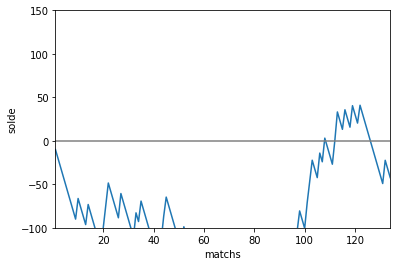

Saison : 1718 / Pays : France/ / gain final : -42.4 / nombre de paris : 134 / critère de sélection : 260
mise par match : 10 / Pourcentage de matchs nuls sur la saison : 25%
En pariant 10 euros par matchs lors de la saison 1718 en France/ , nous aurions au total perdu -42.4 euros


In [42]:
def simulation1(mise, proba):
    y=0
    nul=[]
    for i in grandeliste :
        if i[1] > proba  :
            nul.append(grandeliste[y])
        else:
            pass
        y+=1
    nul_eff=[]
    for i in calendrier_nul :
        for y in nul :
            if y[0]==i[0]:
                nul_eff.append(y)
    solde=[]
    solded=0
    for i in nul :
        for y in nul_eff :
            if i[0]==y[0]:
                solded+=mise*y[2]-mise
                solde.append(solded)
                break
            elif y[0]==nul_eff[-1][0]:
                solded+=(-mise)
                solde.append(solded)
                break
    x=[]
    w=1
    while w <= len(nul):
        x.append(w)
        w+=1
    print("Méthode : Probabilité des simulations")
    graphiqueB(x, solde, x[0],len(x),-100,150)
    
    print('Saison :', saison,'/', "Pays :", pays,'/', 'gain final :', round(solde[-1], 1),'/', 'nombre de paris :', len(nul), '/ critère de sélection :', proba)
    print("mise par match :", mise, "/ Pourcentage de matchs nuls sur la saison :", pourc)
    if round(solde[-1], 1)>0: 
        print("En pariant", mise, "euros par matchs lors de la saison", saison, "en", pays, ", nous aurions au total gagné", round(solde[-1], 1), "euros")
    if round(solde[-1], 1)<0: 
        print("En pariant", mise, "euros par matchs lors de la saison", saison, "en", pays, ", nous aurions au total perdu", round(solde[-1], 1), "euros")

simulation1(10, 260)

Méthode : Probabilité implicites des côtes


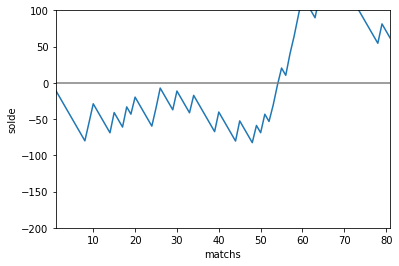

Saison : 1718 / Pays : France/ / gain final : 61.3 / nombre de paris : 81 / critère de sélection : 260
mise par match : 10 / Pourcentage de matchs nuls sur la saison : 25%
En pariant 10 euros par matchs lors de la saison 1718 en France/ , nous aurions au total gagné 61.3 euros


In [43]:
def simulation2(mise, proba):
    y=0
    nul=[]
    
    for i in grandeliste :
        D=i[2]
        H=i[3]
        A=i[4]
        
        if D and H and A != 0:
            probimp=(1/D)/((1/H)+(1/D)+(1/A))
            if i[1] > proba and probimp<(i[1]/1000) :
                nul.append(grandeliste[y])
        else:
            pass
        y+=1
    nul_eff=[]
    for i in calendrier_nul :
        for y in nul :
            if y[0]==i[0]:
                nul_eff.append(y)
    solde=[]
    solded=0
    for i in nul :
        for y in nul_eff :
            if i[0]==y[0]:
                solded+=mise*y[2]-mise
                solde.append(solded)
                break
            elif y[0]==nul_eff[-1][0]:
                solded+=(-mise)
                solde.append(solded)
                break
    no_nul_eff = len(nul)-len(nul_eff)
    wina=0
    for w in nul_eff:
        win= w[2]*mise-mise
        wina+=win
    wina=wina-no_nul_eff*mise
    x=[]
    w=1
    while w <= len(nul):
        x.append(w)
        w+=1    
    
    print("Méthode : Probabilité implicites des côtes")
    graphiqueB(x, solde, x[0],len(x),-200,100)
    
    
    print('Saison :', saison,'/', "Pays :", pays,'/', 'gain final :', round(solde[-1], 1),'/', 'nombre de paris :', len(nul), '/ critère de sélection :', proba)
    print("mise par match :", mise, "/ Pourcentage de matchs nuls sur la saison :", pourc)
    if round(solde[-1], 1)>0: 
        print("En pariant", mise, "euros par matchs lors de la saison", saison, "en", pays, ", nous aurions au total gagné", round(solde[-1], 1), "euros")
    if round(solde[-1], 1)<0: 
        print("En pariant", mise, "euros par matchs lors de la saison", saison, "en", pays, ", nous aurions au total perdu", round(solde[-1], 1), "euros")
simulation2(10, 260)

### Ajustement dynamique

In [44]:
predicted_calendrier2_nul=[]
id_mat=1
while id_mat <= len(id_match) :
    num=[id_mat,0,0,0,0]
    predicted_calendrier2_nul.append(num)
    id_mat+=1
    
score = np.zeros(20)
goals = np.zeros((nb_journees,20,2))
conceded_goals = np.zeros((nb_journees,20,2))
delta = 0.2

for x in range(1000):
    p=0
    score_attaque_domicile = np.copy(score_attaque)
    score_attaque_exterieur = np.copy(score_attaque)
    score_defense_domicile = np.copy(score_defense)
    score_defense_exterieur = np.copy(score_defense)
    i = 0
    home_goal_s=1
    for ele in database:
        cotesup=0
        journee = ele["Date"]
        journe=1
        home_team = ele["HomeTeam"]
        away_team = ele["AwayTeam"]
        for y in cote_nul:
            if ele[y]!='':
                cote =ele[y]
                cote_nom=y
                if cote > cotesup :
                    cotesup=cote
                    cote_nom2=cote_nom
            else:
                pass
        cote_nom_away=cote_nom2[:-1]+'A'
        cote_nom_home=cote_nom2[:-1]+'H'
        cote_nom_A=ele[cote_nom_away]
        cote_nom_H=ele[cote_nom_home]
        if i == 0:
            old_journee = journee
            i = 1
        home_goal_s+=(home_goal+away_goal)
        if old_journee != journee:
            if(any(goals[journees_dict[old_journee]][:,0]) != 0):
                a=score_attaque_domicile[team_names_dict[home_team]]
                hg=goals[journees_dict[journee]][team_names_dict[home_team]][0]
                aa = (1-delta)*a + delta*(hg/(float(home_goal_s)-1))
                score_attaque_domicile[team_names_dict[home_team]]=float(aa)
            if(any(goals[journees_dict[old_journee]][:,1]) != 0):
                ag=goals[journees_dict[journee]][team_names_dict[away_team]][1]
                b=score_attaque_exterieur[team_names_dict[away_team]]
                ba = (1-delta)*b + delta*(ag/(float(home_goal_s)-1))
                score_attaque_exterieur[team_names_dict[away_team]]=float(ba)
            if(any(conceded_goals[journees_dict[old_journee]][:,0]) != 0):
                c=score_defense_domicile[team_names_dict[home_team]]
                acg=conceded_goals[journees_dict[journee]][team_names_dict[home_team]][0]
                if acg !=0:
                    ca = (1-delta)*c + delta*((float(home_goal_s)-1)/(acg))
                    score_defense_domicile[team_names_dict[home_team]]=float(ca)
                else :
                    pass
            if(any(conceded_goals[journees_dict[old_journee]][:,1]) != 0):
                d=score_defense_exterieur[team_names_dict[away_team]]
                hcg=conceded_goals[journees_dict[journee]][team_names_dict[away_team]][1]
                if hcg !=0:
                    da = (1-delta)*d + delta*((float(home_goal_s)-1)/(hcg))
                    score_defense_exterieur[team_names_dict[away_team]]=float(da)
                else :
                    pass
            home_goal_s=1
            journe+=1
            old_journee = journee
            
        home_goal = np.random.poisson(score_attaque_domicile[team_names_dict[home_team]]*score_defense_exterieur[team_names_dict[away_team]],1)
        away_goal = np.random.poisson(score_attaque_exterieur[team_names_dict[away_team]]*score_defense_domicile[team_names_dict[home_team]],1)
        
        goals[journees_dict[journee]][team_names_dict[home_team]][0] = home_goal
        goals[journees_dict[journee]][team_names_dict[away_team]][1] = away_goal

        conceded_goals[journees_dict[journee]][team_names_dict[away_team]][1] = home_goal
        conceded_goals[journees_dict[journee]][team_names_dict[home_team]][0] = away_goal

        if(home_goal == away_goal):
            predicted_calendrier2_nul[p][1]=predicted_calendrier2_nul[p][1]+1
            predicted_calendrier2_nul[p][2]=cotesup
            predicted_calendrier2_nul[p][3]=cote_nom_A
            predicted_calendrier2_nul[p][4]=cote_nom_H   
        else:
            pass
        p+=1

In [45]:
predicted_calendrier2_nul

[[1, 11, 6, 11.2, 1.35],
 [2, 2, 5.55, 10.35, 1.34],
 [3, 305, 3.35, 2.54, 3.01],
 [4, 287, 3.69, 4.92, 1.83],
 [5, 0, 0, 0, 0],
 [6, 278, 3.25, 3.75, 2.33],
 [7, 199, 3.2, 2.75, 2.7],
 [8, 116, 3.14, 3.31, 2.5],
 [9, 185, 3.3, 4.2, 2.3],
 [10, 47, 5.8, 11.5, 1.31],
 [11, 216, 4.51, 7.06, 1.52],
 [12, 18, 3.68, 2.09, 3.69],
 [13, 301, 3.14, 2.75, 3.04],
 [14, 201, 5.05, 7.76, 1.44],
 [15, 173, 3.24, 2.64, 3.01],
 [16, 94, 3.44, 2.25, 3.7],
 [17, 294, 3.25, 3.5, 2.2],
 [18, 23, 4.67, 1.51, 7.05],
 [19, 0, 0, 0, 0],
 [20, 70, 3.59, 2.12, 3.7],
 [21, 28, 5.93, 1.33, 10.3],
 [22, 41, 4.33, 5.5, 1.57],
 [23, 290, 3.75, 4.85, 1.88],
 [24, 243, 3.64, 4.82, 1.86],
 [25, 274, 4.15, 6.41, 1.65],
 [26, 84, 4.1, 7.75, 1.57],
 [27, 227, 3.25, 3.04, 2.61],
 [28, 97, 4, 5.5, 1.62],
 [29, 29, 4.07, 6.21, 1.62],
 [30, 0, 0, 0, 0],
 [31, 1, 13.25, 35, 1.09],
 [32, 185, 3.33, 2.42, 3.25],
 [33, 80, 4.92, 8.94, 1.42],
 [34, 315, 3.7, 5.07, 1.81],
 [35, 268, 3.32, 2.95, 2.65],
 [36, 10, 3.66, 2.16, 3.47],


In [46]:
matchs=[]
results=[]

i=0
while i < len(predicted_calendrier2_nul):
    matchs.append(predicted_calendrier2_nul[i][0])
    results.append(predicted_calendrier2_nul[i][1]/1000)
    i+=1

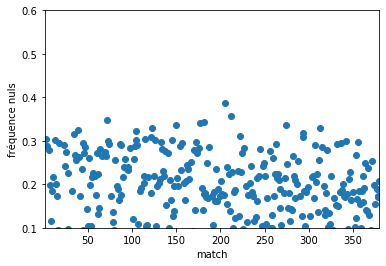

In [47]:
nuagedepoint(matchs, results, 1,len(matchs),0.1,0.6)

Méthode : Probabilité des simulations par l'ajustement dynamique


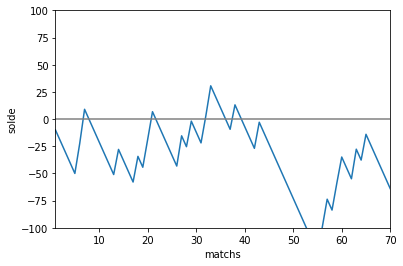

Saison : 1718 / Pays : France/ / gain final : -64.0 / nombre de paris : 70 / critère de sélection : 260
mise par match : 10 / Pourcentage de matchs nuls sur la saison : 25%
En pariant 10 euros par matchs lors de la saison 1718 en France/ , nous aurions au total perdu -64.0 euros


In [48]:
def simulation1(mise, proba):
    y=0
    nul=[]
    for i in predicted_calendrier2_nul:
        if i[1] > proba  :
            nul.append(predicted_calendrier2_nul[y])
        else:
            pass
        y+=1
    nul_eff=[]
    for i in calendrier_nul :
        for y in nul :
            if y[0]==i[0]:
                nul_eff.append(y)
    solde=[]
    solded=0
    for i in nul :
        for y in nul_eff :
            if i[0]==y[0]:
                solded+=mise*y[2]-mise
                solde.append(solded)
                break
            elif y[0]==nul_eff[-1][0]:
                solded+=(-mise)
                solde.append(solded)
                break
    x=[]
    w=1
    while w <= len(nul):
        x.append(w)
        w+=1
    print("Méthode : Probabilité des simulations par l'ajustement dynamique")
    graphiqueB(x, solde, x[0],len(x),-100,100)
    
    print('Saison :', saison,'/', "Pays :", pays,'/', 'gain final :', round(solde[-1], 1),'/', 'nombre de paris :', len(nul), '/ critère de sélection :', proba)
    print("mise par match :", mise, "/ Pourcentage de matchs nuls sur la saison :", pourc)
    if round(solde[-1], 1)>0: 
        print("En pariant", mise, "euros par matchs lors de la saison", saison, "en", pays, ", nous aurions au total gagné", round(solde[-1], 1), "euros")
    if round(solde[-1], 1)<0: 
        print("En pariant", mise, "euros par matchs lors de la saison", saison, "en", pays, ", nous aurions au total perdu", round(solde[-1], 1), "euros")

simulation1(10, 260)

Méthode : Probabilité implicites des côtes par l'ajustement dynamique


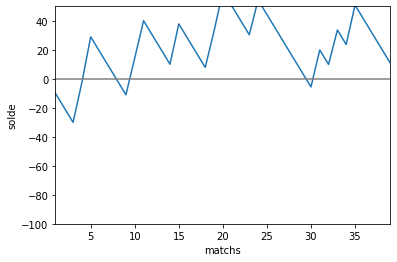

Saison : 1718 / Pays : France/ / gain final : 10.9 / nombre de paris : 39 / critère de sélection : 260
mise par match : 10 / Pourcentage de matchs nuls sur la saison : 25%
En pariant 10 euros par matchs lors de la saison 1718 en France/ , nous aurions au total gagné 10.9 euros


In [49]:
def simulation2(mise, proba):
    y=0
    nul=[]
    for i in predicted_calendrier2_nul :
        D=i[2]
        H=i[3]
        A=i[4]
        if D and H and A != 0:
            probimp=(1/D)/((1/H)+(1/D)+(1/A))
            if i[1] > proba and probimp<(i[1]/1000) :
                nul.append(predicted_calendrier2_nul[y])
        else:
            pass
        y+=1
    nul_eff=[]
    for i in calendrier_nul :
        for y in nul :
            if y[0]==i[0]:
                nul_eff.append(y)
    solde=[]
    solded=0
    for i in nul :
        for y in nul_eff :
            if i[0]==y[0]:
                solded+=mise*y[2]-mise
                solde.append(solded)
                break
            elif y[0]==nul_eff[-1][0]:
                solded+=(-mise)
                solde.append(solded)
                break
    no_nul_eff = len(nul)-len(nul_eff)
    wina=0
    for w in nul_eff:
        win= w[2]*mise-mise
        wina+=win
    wina=wina-no_nul_eff*mise
    x=[]
    w=1
    while w <= len(nul):
        x.append(w)
        w+=1    
    print("Méthode : Probabilité implicites des côtes par l'ajustement dynamique")
    graphiqueB(x, solde, x[0],len(x),-100,50)
    
    
    print('Saison :', saison,'/', "Pays :", pays,'/', 'gain final :', round(solde[-1], 1),'/', 'nombre de paris :', len(nul), '/ critère de sélection :', proba)
    print("mise par match :", mise, "/ Pourcentage de matchs nuls sur la saison :", pourc)
    if round(solde[-1], 1)>0: 
        print("En pariant", mise, "euros par matchs lors de la saison", saison, "en", pays, ", nous aurions au total gagné", round(solde[-1], 1), "euros")
    if round(solde[-1], 1)<0: 
        print("En pariant", mise, "euros par matchs lors de la saison", saison, "en", pays, ", nous aurions au total perdu", round(solde[-1], 1), "euros")
        
simulation2(10, 260)

# Approche fréquentiste

In [23]:
freq = json.load(open("Frequences/Fr1819.json"))
freq

[{'Projection 2018/2019': '',
  '': '',
  'Montpellier': '0,47',
  'Angers': '0,37',
  'Marseille': '0,29',
  'Guingamp': '0,29',
  'Strasbourg': '0,29',
  'Rennes': '0,26',
  'St Etienne': '0,26',
  'Nantes': '0,26',
  'Toulouse': '0,26',
  'Lyon': '0,24',
  'Nice': '0,24',
  'Dijon': '0,24',
  'Amiens': '0,24',
  'Monaco': '0,21',
  'Caen': '0,21',
  'Lille': '0,21',
  'Metz': '0,21',
  'Bordeaux': '0,18',
  'Paris SG': '0,16',
  'Troyes': '0,16'},
 {'Projection 2018/2019': 'Montpellier',
  '': '0,47',
  'Montpellier': '',
  'Angers': '0,69',
  'Marseille': '0,55',
  'Guingamp': '0,55',
  'Strasbourg': '0,55',
  'Rennes': '0,5',
  'St Etienne': '0,5',
  'Nantes': '0,5',
  'Toulouse': '0,5',
  'Lyon': '0,45',
  'Nice': '0,45',
  'Dijon': '0,45',
  'Amiens': '0,45',
  'Monaco': '0,4',
  'Caen': '0,4',
  'Lille': '0,4',
  'Metz': '0,4',
  'Bordeaux': '0,35',
  'Paris SG': '0,3',
  'Troyes': '0,3'},
 {'Projection 2018/2019': 'Angers',
  '': '0,37',
  'Montpellier': '0,69',
  'Angers': ''

In [24]:
del team_names_dict['Nimes']

KeyError: 'Nimes'

In [ ]:
del team_names_dict['Reims']

In [ ]:
del team_names_dict['Caen']

In [ ]:
eq1=[]
eq2=[]
frekl1=[]
for y in team_names_dict :
    for i in freq :
        a=i['Projection 2018/2019']
        if a==y :
            pass
        elif a=='':
            pass
        else : 
            eq1.append(a)
            eq2.append(y)
            frekl1.append(i[y])


In [ ]:
frekl1

In [ ]:
frekl=[]
for i in frekl1 :
    if i[1]==',':
        i=i.replace(',', '.')
        frekl.append(i)
frekl

In [ ]:
print(len(database))

In [ ]:
listefreq=[]
i=1
p=0
while i <= len(eq1) : 
    num=[0, 0, 0, 0, 0, 0, 0]
    listefreq.append(num)
    i+=1
numero=1
for i in database   :
    y=0
    cotesup=0
    for w in cote_nul:
        if i[w]!='':
            cote =i[w]
            cote_nom=w
            if cote > cotesup :
                cotesup=cote
                cote_nom2=cote_nom
        else:
            pass
        cote_nom_away=cote_nom2[:-1]+'A'
        cote_nom_home=cote_nom2[:-1]+'H'
        cote_nom_A=i[cote_nom_away]
        cote_nom_H=i[cote_nom_home]
    while y !=len(eq1): 
        if eq1[y] == i["HomeTeam"] and eq2[y] == i["AwayTeam"]:
            listefreq[p][0]=eq1[y]
            listefreq[p][1]=eq2[y]
            listefreq[p][2]=float(frekl[y])
            listefreq[p][4]=cotesup
            listefreq[p][3]=cote_nom_A
            listefreq[p][5]=cote_nom_H
            listefreq[p][6]=numero
            p+=1
            y=len(eq1)
        else :
            y+=1
    numero+=1

In [ ]:
i=0
while i< len(listefreq):
    if listefreq[i][0]==0:
        del listefreq[i]
    else : 
        i+=1

In [515]:
listefreq

[['Marseille', 'Toulouse', 0.3, 8.79, 4.87, 1.48, 1],
 ['Lille', 'Rennes', 0.22, 3.1, 3.39, 2.63, 3],
 ['Montpellier', 'Dijon', 0.45, 5.75, 3.82, 1.78, 4],
 ['Nantes', 'Monaco', 0.22, 2.41, 3.44, 3.35, 5],
 ['St Etienne', 'Guingamp', 0.3, 4.81, 3.76, 1.9, 7],
 ['Bordeaux', 'Strasbourg', 0.21, 5, 3.8, 1.7, 8],
 ['Lyon', 'Amiens', 0.22, 15, 7.01, 1.26, 9],
 ['Paris SG', 'Caen', 0.13, 41, 13, 1.12, 10],
 ['Amiens', 'Montpellier', 0.45, 2.6, 3.21, 3.3, 12],
 ['Caen', 'Nice', 0.2, 3, 3.34, 2.9, 13],
 ['Dijon', 'Nantes', 0.25, 2.93, 3.51, 2.7, 14],
 ['Guingamp', 'Paris SG', 0.18, 1.29, 7.03, 13, 15],
 ['Monaco', 'Lille', 0.18, 7.2, 4.67, 1.58, 16],
 ['Rennes', 'Angers', 0.39, 4.75, 3.51, 1.99, 17],
 ['Strasbourg', 'St Etienne', 0.3, 2.83, 3.4, 2.85, 19],
 ['Toulouse', 'Bordeaux', 0.19, 3.1, 3.28, 2.7, 20],
 ['Lyon', 'Strasbourg', 0.27, 12, 6.5, 1.33, 21],
 ['Montpellier', 'St Etienne', 0.5, 3.27, 3.28, 2.52, 23],
 ['Nantes', 'Caen', 0.22, 4.6, 3.4, 2.05, 24],
 ['Nice', 'Dijon', 0.22, 4.56, 3

Méthode : Approche fréquentiste


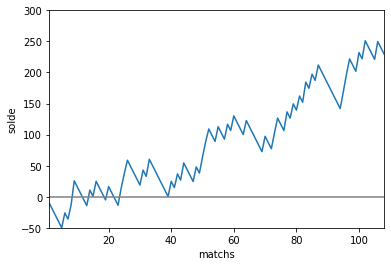

Saison : 1819 / Pays : France / gain final : 229.9 / nombre de paris : 108 / critère de sélection : 260
mise par match : 10 / Pourcentage de matchs nuls sur la saison : 29%
En pariant 10 euros par matchs lors de la saison 1819 en France , nous aurions au total gagné 229.9 euros


In [520]:
def simulation3(mise, proba):
    nul=[]
    y=0
    for i in listefreq :
        D=i[4]
        H=i[5]
        A=i[3]
        if D and H and A != 0:
            probimp=(1/D)/((1/H)+(1/D)+(1/A))
            if i[2]*1000 > proba and probimp<(i[2]) :
                nul.append(listefreq[y])
        else:
            pass
        y+=1
    nul_eff=[]
    for i in calendrier_nul :
        for y in nul :
            if y[6]==i[0]:
                nul_eff.append(y)
    solde=[]
    solded=0
    for i in nul :
        for y in nul_eff :
            if i[6]==y[6]:
                solded+=mise*y[4]-mise
                solde.append(solded)
                break
            elif y[6]==nul_eff[-1][6]:
                solded+=(-mise)
                solde.append(solded)
                break
    no_nul_eff = len(nul)-len(nul_eff)
    wina=0
    for w in nul_eff:
        win= w[4]*mise-mise
        wina+=win
    wina=wina-no_nul_eff*mise
    x=[]
    w=1
    while w <= len(nul):
        x.append(w)
        w+=1
        
    print("Méthode : Approche fréquentiste")
    graphiqueB(x, solde, x[0],len(x),-50,300)
    
    
    print('Saison :', saison,'/', "Pays :", pays,'/', 'gain final :', round(solde[-1], 1),'/', 'nombre de paris :', len(nul), '/ critère de sélection :', proba)
    print("mise par match :", mise, "/ Pourcentage de matchs nuls sur la saison :", pourc)
    if round(solde[-1], 1)>0: 
        print("En pariant", mise, "euros par matchs lors de la saison", saison, "en", pays, ", nous aurions au total gagné", round(solde[-1], 1), "euros")
    if round(solde[-1], 1)<0: 
        print("En pariant", mise, "euros par matchs lors de la saison", saison, "en", pays, ", nous aurions au total perdu", round(solde[-1], 1), "euros")
simulation3(10, 260)